In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from google.colab import drive
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from xgboost import XGBClassifier

LINK TO DATASET - https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos

PCOS_data_without_infertility dataset was cleaned:
- Row 307, 158, and 458 were deleted due to missing data
- BMI, FSH/LH, and waist/hip ratio was recalculated
- Replaced 1.99. --> 1.99 on column 'II    beta-HCG(mIU/mL)' row 125
- Extra empty rows and columns were deleted to prevent NaN error

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
file_path="/content/drive/MyDrive/ML for Medicine/ML/Totally_Cleaned_Dataset.csv"

data = pd.read_csv(file_path)

In [4]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.304017,15,78,22,...,0,1,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0,0,120,80,3,4,16.0,14.0,7.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  538 non-null    int64  
 1   Patient File No.        538 non-null    int64  
 2   PCOS (Y/N)              538 non-null    int64  
 3    Age (yrs)              538 non-null    int64  
 4   Weight (Kg)             538 non-null    float64
 5   Height(Cm)              538 non-null    float64
 6   BMI                     538 non-null    float64
 7   Blood Group             538 non-null    int64  
 8   Pulse rate(bpm)         538 non-null    int64  
 9   RR (breaths/min)        538 non-null    int64  
 10  Hb(g/dl)                538 non-null    float64
 11  Cycle(R/I)              538 non-null    int64  
 12  Cycle length(days)      538 non-null    int64  
 13  Marraige Status (Yrs)   538 non-null    float64
 14  Pregnant(Y/N)           538 non-null    in

In [6]:
data = data.drop(columns=['Sl. No', 'Patient File No.'])

In [7]:
data.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,...,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,0.327138,31.420074,59.644052,156.480104,24.323562,13.802974,73.250929,19.236059,11.160558,2.555762,...,0.490706,0.516729,0.245353,114.631970,76.947955,6.120818,6.646840,15.014498,15.448643,8.477454
std,0.469605,5.413801,11.051033,6.042238,4.059873,1.844573,4.441870,1.688509,0.868516,0.899852,...,0.500379,0.500185,0.430697,7.394337,5.572034,4.226181,4.448108,3.567421,3.322812,2.165036
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.739333,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.300000,156.000000,24.236563,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.659729,15.000000,74.000000,20.000000,11.775000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900714,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


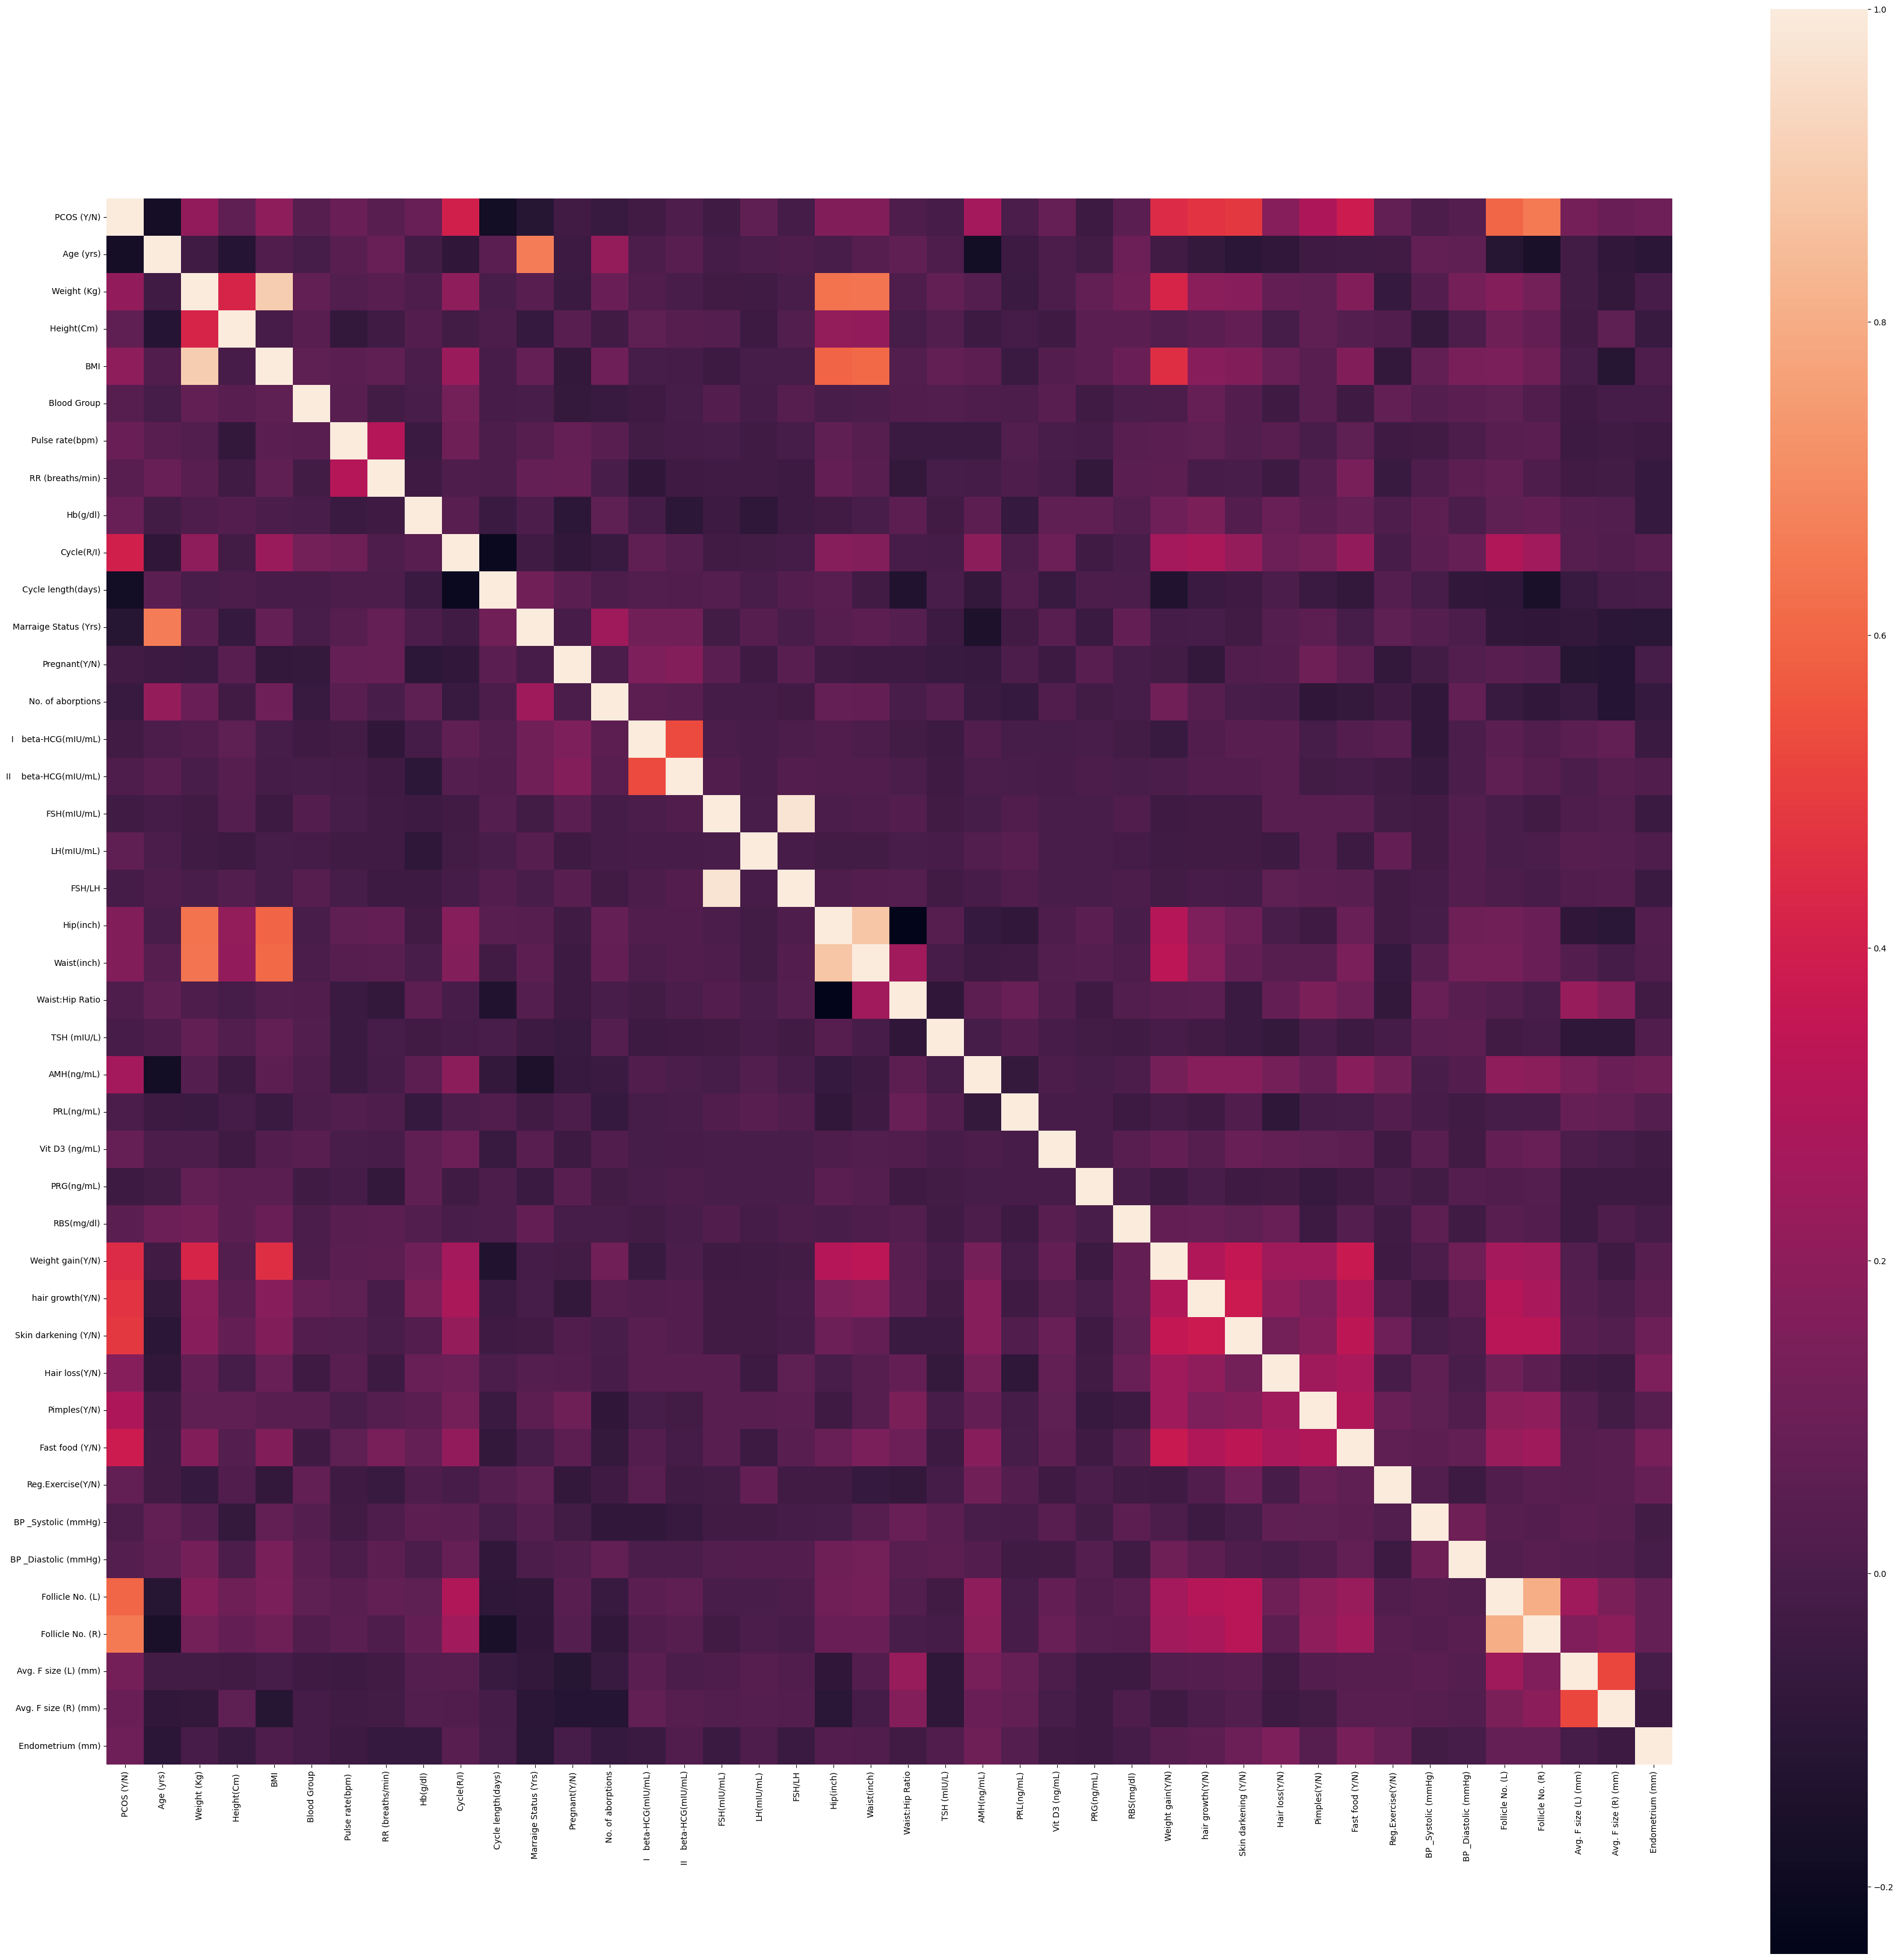

In [8]:
corrmat = data.corr()
plt.subplots(figsize=(42,42))
sns.heatmap(corrmat,square=True);

In [9]:
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

,PCOS (Y/N)
PCOS (Y/N),1.000000
Follicle No. (R),0.650929
Follicle No. (L),0.601208
Skin darkening (Y/N),0.481323
hair growth(Y/N),0.466508
Weight gain(Y/N),0.443093
Cycle(R/I),0.401837
Fast food (Y/N),0.380985
Pimples(Y/N),0.290335
AMH(ng/mL),0.263974


Notes:

Xgboost is essentially random forest but with different decision trees and different ways of combining decision trees. It is a type of gradient boosting algorithm, as each tree is supposed to be better than the previous one, creating a "gradient". We start off with a simple decision tree called decistion stump. We then measure the error of this tree and create another tree that is based off of the residuals. This process will minimize the loss function.

In [10]:
#split data into training and testing
corr = data.corr(numeric_only=True)["PCOS (Y/N)"]
weak_features = corr[abs(corr) < 0.3].index.tolist()  #modify this number can increase accuracy by avoiding overfitting to irrelevant data
predictors_and_target = data.drop(columns=weak_features)

train, test = train_test_split(predictors_and_target, test_size=0.2, random_state=42, stratify=data['PCOS (Y/N)'])
trainX = train.drop(columns='PCOS (Y/N)')
trainY = train['PCOS (Y/N)']

testX = test.drop(columns='PCOS (Y/N)')
testY = test['PCOS (Y/N)']

In [11]:
#scale data
scaler = StandardScaler()
trainX_scaled = scaler.fit_transform(trainX)
testX_scaled = scaler.transform(testX)

In [12]:
#define model

model = XGBClassifier(random_state=42, objective='binary:logistic', learning_rate = 0.1, max_depth = 8, n_estimators = 50)

#fit model
model.fit(trainX_scaled, trainY)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

Parameters:

learning_rate: large value speeds up process but risk overfitting. Small values need larger n_estimators

objective: objective of this xgboost.

In [13]:
#Model prediction evaluation

predY = model.predict(testX_scaled)

accuracy = accuracy_score(testY, predY)
print(f"Model Accuracy:")
print(accuracy, "\n")

conf_matrix = confusion_matrix(testY, predY)
print("Confusion Matrix:")
print(conf_matrix, "\n")

w = classification_report(testY, predY)
print("\nClassification Report:")
print(w, "\n")

Model Accuracy:
0.9259259259259259 

Confusion Matrix:
[[69  4]
 [ 4 31]] 


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        73
           1       0.89      0.89      0.89        35

    accuracy                           0.93       108
   macro avg       0.92      0.92      0.92       108
weighted avg       0.93      0.93      0.93       108
 

